# Titanic 6: Model Selection

## 1. Preprocessing Pipeline

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# reading
url = "https://drive.google.com/file/d/19URNvJqMVhZH9A_l9q8XU31klPD1px3K/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

# X and y creation
X = data
y = X.pop("Expensive")

# Feature Engineering
#X.loc[:, "Cabin"] = X.Cabin.str[0]

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

## 2. Modelling (Decision Tree)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

full_pipeline = make_pipeline(preprocessor, 
                              scaler,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      scoring='accuracy',
                      verbose=1)

search.fit(X_train, y_train)

# create a dictionary to keep track of the scores of different models 
scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", l

ValueError: ignored

## 3. Error analysis

In [ ]:
# test accuracy
accuracy_score(search.predict(X_test), y_test)

0.8435754189944135

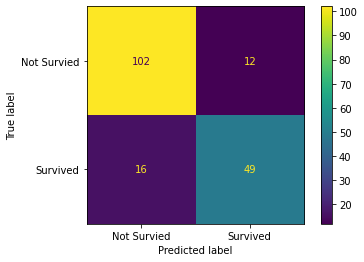

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Survied', 'Survived']);

### **Exercise 1:** build the same pipeline using a KNN instead of a decision tree.

Read the Platform lesson on KNN: https://platform.wbscodingschool.com/courses/data-science/11375/ 

> **Tip**: Check the SciKit-Learn docummentation to find how to import the KNN model for this task and how to tune its hyperparameters (the names and possible values of the parameters).


In [ ]:
# solution
from sklearn.neighbors import KNeighborsClassifier

knn_full_pipeline = make_pipeline(preprocessor,
                                  StandardScaler(),
                                  KNeighborsClassifier()
                                 )

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      scoring='accuracy',
                      verbose=1)

knn_search.fit(X_train, y_train)

scores["knn"] = knn_search.best_score_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [ ]:
knn_search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
pd.DataFrame(scores, index=["best_score_"])

,dtree,knn
best_score_,0.804767,0.806156


### **Exercise 2:** build the same pipeline using other algorithms

Go through the Plaform lesson on Model Selection () and check the performance of, at least, the following algorithms: 

* Logistic Regression
* Support Vector Machine
* Random Forest

In [ ]:
# your code here

## **Your challenge**

In a new notebook, apply everything you have learned here to the Housing project, following the Learning platform.